# Investigate tweets for question


In [9]:
# import core libraries 
import datetime
import re
import csv
import pathlib
import itertools
from collections import Counter
from itertools import islice

# import third-party libraries
import pandas
from pandas.io.json import json_normalize


In [10]:
# set directory path data
syria_data_dir = pathlib.Path('/Users/adamstueckrath/Desktop/syria_data/')


In [11]:
def string_to_datetime(tweet_date):
    """
    Turns a datetime string like this: 
    '2017-07-06T18:34:37.000Z' 
    to a Python datetime object like this -> 2017-07-06 18:34:41
    """
    return datetime.datetime.strptime(tweet_date, "%Y-%m-%dT%H:%M:%S.%fZ")


In [12]:
'''
headers = ['tweet_id', 'tweet_id_str', 'tweet_created_at', 'tweet_geo', 'tweet_coordinates', 
           'place_type', 'place_name', 'place_full_name', 'place_country', 'place_country_code',
           'bounding_box_type', 'bounding_box_coordinates', 'tweet_lang', 
           'tweet_source', 'tweet_text', 'tweet_retweet_count', 'tweet_favorite_count', 
           'user_id_str', 'user_screen_name', 'user_name', 'user_location', 'user_utc_offset', 
           'user_verified', 'user_followers_count', 'tweet_hashtags', 'tweet_user_mentions', 
           'tweet_expanded_url', 'tweet_media_type', 'tweet_media_url']
'''


In [13]:
# tweets_no_rts_csv file path
tweets_no_rts_csv = syria_data_dir / 'tweets_no_retweets' / 'tweets_no_retweets.csv'


In [14]:
# load tweets into dataframe from csv file
tweets_no_rts_df = pandas.read_csv(tweets_no_rts_csv, header=0,
                                   parse_dates=['tweet_created_at'], 
                                   date_parser=string_to_datetime)


In [15]:
# print dataframe
tweets_no_rts_df.shape


(1160088, 29)

In [34]:
# set event data from events dataset
event_date = pandas.to_datetime('2017-08-04').date()
print(event_date)


2017-08-04


In [35]:
def testing_date(tweet_date):
    if tweet_date.date() == event_date:
        return True
    return False 

tweets_no_rts_df['Test_Date'] = tweets_no_rts_df["tweet_created_at"].apply(lambda tweet: testing_date(tweet))



In [37]:
tweets_no_rts_df['Test_Date'].value_counts()

True    25657
Name: Test_Date, dtype: int64

In [36]:
tweets_no_rts_df = tweets_no_rts_df[tweets_no_rts_df.Test_Date == True]

In [29]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def check_tweet(tweet):
    tweet = clean_tweet(tweet.lower())
    tweet = tweet.split()
    for word in tweet: 
        if word in event_list:
            return True
        return False 
    

In [45]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

def normalizer(tweet):
    only_letters = re.sub("[^a-zA-Z]", " ", tweet) 
    tokens = nltk.word_tokenize(only_letters)
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
#     for word in lemmas: 
#         if word in event_list:
#             return True
#         return False 
    return lemmas



## Finding an event to match tweet

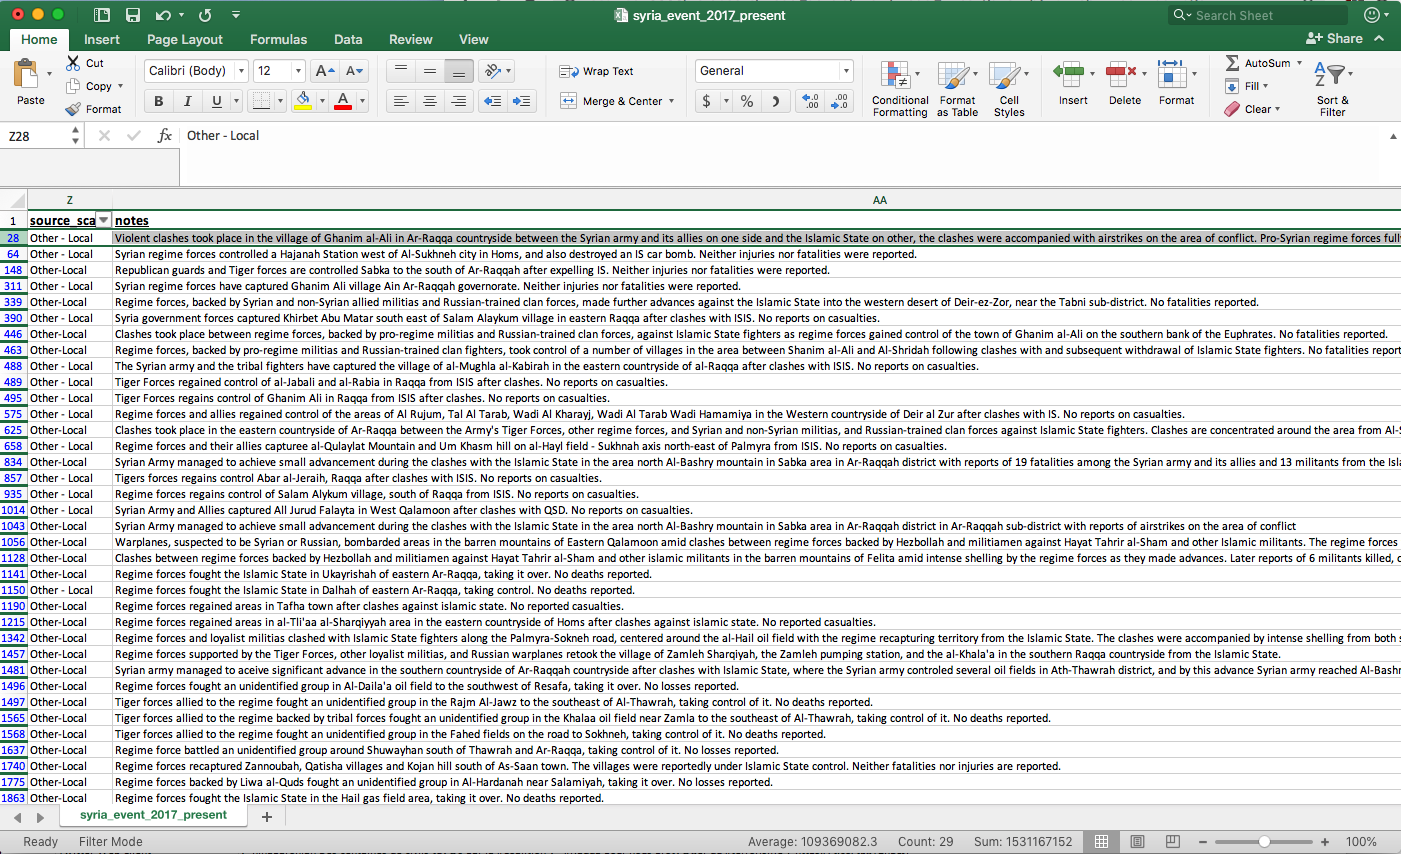

In [105]:
event_test = 'Violent clashes took place in the village of Ghanim al-Ali in Ar-Raqqa countryside between the Syrian army and its allies on one side and the Islamic State on other, the clashes were accompanied with airstrikes on the area of conflict. Pro-Syrian regime forces fully controlled the village. No fatalities reported.'
event_list = normalizer(event_test)
print(event_list)


['violent', 'clash', 'took', 'place', 'village', 'ghanim', 'al', 'ali', 'ar', 'raqqa', 'countryside', 'syrian', 'army', 'ally', 'one', 'side', 'islamic', 'state', 'clash', 'accompanied', 'airstrikes', 'area', 'conflict', 'pro', 'syrian', 'regime', 'force', 'fully', 'controlled', 'village', 'fatality', 'reported']


In [106]:
event_list_test = event_list

In [107]:
def normalizer_2(tweet):
    only_letters = re.sub("[^a-zA-Z]", " ", tweet) 
    tokens = nltk.word_tokenize(only_letters)
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
    return lemmas

def is_words_match(tweet):
    return list((map(lambda each: each in event_list_test,tweet)))

def check(tweet):
    test = is_words_match(tweet)
    if any(test):
        return True
    return False


In [108]:
test = 'Hi this is im analyzing data'
test_list = normalizer_2(test)
print(test_list)

testing = check(test_list) 
print(testing)

['hi', 'im', 'analyzing', 'data']
False


In [109]:
tweets_no_rts_df['Test_lemmas'] = tweets_no_rts_df["tweet_text"].apply(lambda tweet: normalizer_2(tweet))


In [110]:
tweets_no_rts_df['Test_Event'] = tweets_no_rts_df["Test_lemmas"].apply(lambda tweet: check(tweet))


In [111]:
df_filtered = tweets_no_rts_df[tweets_no_rts_df.Test_Event == True]

In [112]:
df_filtered.to_csv('/Users/adamstueckrath/Desktop/syria_data/model/question_test.csv')

In [113]:
df_filtered.loc[1147361]

tweet_id                                             59845e48e6b68e736eb5ff5c
tweet_id_str                                               893437658432765952
tweet_created_at                                          2017-08-04 11:45:11
tweet_geo                                                                 NaN
tweet_coordinates                                                         NaN
place_type                                                                NaN
place_name                                                                NaN
place_full_name                                                           NaN
place_country                                                             NaN
place_country_code                                                        NaN
bounding_box_type                                                         NaN
bounding_box_coordinates                                                  NaN
tweet_lang                                                      

In [114]:
df_filtered.loc[1147361].tweet_text

'#Assad militias captured "Ghanem Ali" village in the eastern countryside of #Raqqa after the withdraw of #ISIS fighters.'

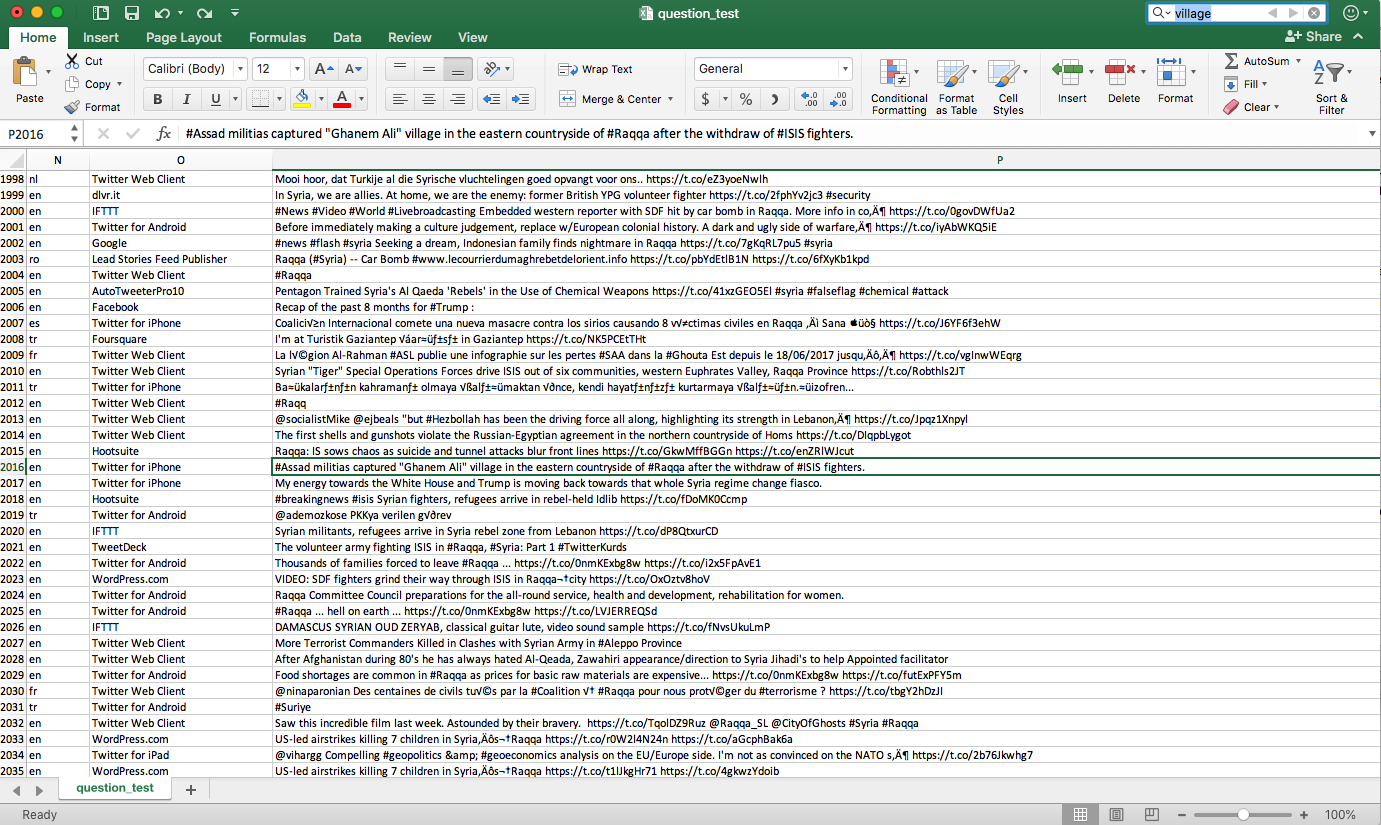

https://twitter.com/i/web/status/893504890303021057